In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
# 0.75 : 直线大概的斜率
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

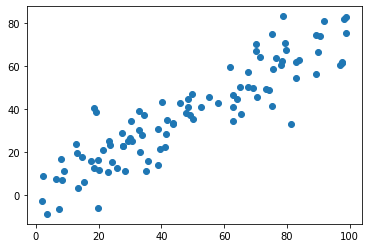

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.show()

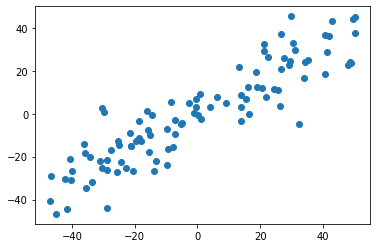

In [15]:
def demean(X):
    return X - np.mean(X, axis=0)

X_demean = demean(X)

plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()


In [16]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

# 梯度
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 测试
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

# 单位归一化
def direction(w):
    return w / np.linalg.norm(w)

# 梯度上升法
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        # 梯度下降法 w = w - eta * gradient
        w = w + eta * gradient 
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [18]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w


eta = 0.001

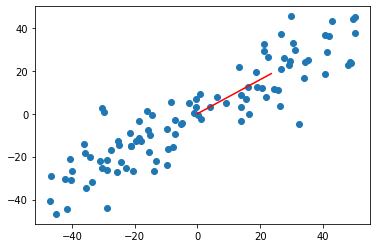

In [22]:
# 得到可以映射到的轴(尽可能保持空间间隔最大)
gradient_ascent(df_debug, X_demean, initial_w, eta)


w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()
